# Real-world Data Science: Applications of Visualization
## Qinyu Chen

In [236]:
# setting

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='crowwwww56', api_key='YNELI27nGE9bz8ZSFaxZ')
import plotly.plotly as py
import plotly.graph_objs as go

import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier

## 1 EDA

In [219]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [220]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [222]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


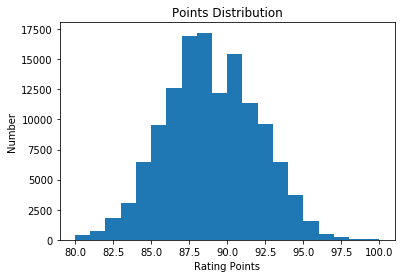

In [223]:
# Visualization 1: Points Distribution

plt.hist(data["points"], bins=20)
plt.title("Points Distribution")
plt.xlabel("Rating Points")
plt.ylabel("Number")
plt.show()

In the first visualization,...

In [224]:
# 改

# Visualization 2: Choropleth Map

country_counts = data['country'].value_counts()

py.iplot([go.Choropleth(
    locationmode = 'country names',
    locations = country_counts.index.values,
    text = country_counts.index,
    z = country_counts.values
)])

In the second visualization,...

## 2 Data Preprocessing

In [225]:
# drop columns, duplicates, na

# 'Unnamed: 0' is not related 
# 'designation', 'region_2,taster_twitter_handle' containing too many nan
# use 'description' instead of 'title'
data = data.drop(columns = ['Unnamed: 0','region_2','designation','taster_twitter_handle','title'])

data = data.drop_duplicates()
data = data.dropna()

data = data.reset_index(drop=True)

In [226]:
data.head()

,country,description,points,price,province,region_1,taster_name,variety,winery
0,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
1,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian
2,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
3,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem
4,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Frappato,Terre di Giurfo


In [227]:
# choosing random subset of the dataset

data = data.sample(n=5000)
data = data.reset_index(drop=True)

In [228]:
data.shape

(5000, 9)

In [229]:
data.head()

,country,description,points,price,province,region_1,taster_name,variety,winery
0,US,"This big, oaky and tannic red is robustly lace...",88,39.0,California,Carneros,Virginie Boone,Pinot Noir,Calla Lily
1,Argentina,"Earthy and ripe, this midnight-black Cab opens...",91,23.0,Mendoza Province,Mendoza,Michael Schachner,Cabernet Sauvignon,Finca El Origen
2,Italy,"Aromas suggest blackberry, cedar and Mediterra...",94,227.0,Tuscany,Bolgheri Sassicaia,Kerin O’Keefe,Red Blend,Tenuta San Guido
3,US,"A 50/50 blend of Pommard and Dijon 777 grapes,...",92,66.0,Oregon,Chehalem Mountains,Paul Gregutt,Pinot Noir,Anam Cara
4,US,"Bold and pretty at the same time, this has ood...",90,36.0,California,Amador County,Jim Gordon,Barbera,Borjón


In [230]:
data.dtypes

country         object
description     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
variety         object
winery          object
dtype: object

In [231]:
# one-hot encoding for categorical columns 

data = pd.get_dummies(data, columns = ["country","province","region_1","taster_name","variety","winery"])
data.shape

(5000, 4084)

In [232]:
# clean text data by removing stop words, tokenization, stemming

stopwords = []
with open('stopwords_english.txt') as fsw:
    for word in fsw.readlines():
        word = word.strip('\n')
        stopwords.append(word)
fsw.close()

def preprocess_text(text):
    text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    text = text.apply(lambda x: " ".join(x.strip() for x in str(x).split()))
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace('\d+', '')
    text = text.apply(lambda x: " ".join([word for word in str(x).split() if word not in (stopwords)]))
    text = text.astype(str)
    return text
data['description'] = preprocess_text(data['description'])

ps = nltk.stem.PorterStemmer()
def stem(text):
    text = text.apply(lambda x: " ".join([ps.stem(x) for x in str(x).split()]))
    return text
data['description'] = stem(data['description'])

In [233]:
data['description'].head()

0    big oaki tannic red robustli lace cranberri ch...
1    earthi ripe midnightblack cab open ripe aroma ...
2    aroma suggest blackberri cedar mediterranean s...
3    blend pommard dijon grape biggest brightest ju...
4    bold pretti time oodl crush berri aroma ripe f...
Name: description, dtype: object

In [234]:
# split dataset into train set and test set

train, test = train_test_split(data,test_size=0.2,random_state=0)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [235]:
train.shape, test.shape

((4000, 4084), (1000, 4084))

In [237]:
# normalize quantitative columns

scaler = StandardScaler()

train[['price','points']] = scaler.fit_transform(train[['price','points']])
test[['price','points']] = scaler.transform(test[['price','points']])

In [238]:
# get X_train, X_test, y_train, y_test

X_train = train.drop(['points'],axis=1)
X_test = test.drop(['points'],axis=1)
y_train = train['points']
y_test = test['points']

In [239]:
train.shape, test.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 4084), (1000, 4084), (4000, 4083), (1000, 4083), (4000,), (1000,))

In [240]:
# TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf = True)
train_text = vectorizer.fit_transform(X_train.description)
test_text = vectorizer.transform(X_test.description)

In [241]:
# LDA
lda = LatentDirichletAllocation(n_components=10)
train_text = lda.fit_transform(train_text)
test_text = lda.transform(test_text) 

In [242]:
train_text,test_text

(array([[0.02004754, 0.02003854, 0.02003858, ..., 0.02003916, 0.64235927,
         0.02004219],
        [0.01674466, 0.01673892, 0.01673815, ..., 0.01673813, 0.55674893,
         0.30933865],
        [0.65443736, 0.01983814, 0.01983814, ..., 0.01983814, 0.01984124,
         0.01984008],
        ...,
        [0.01565986, 0.0156555 , 0.01565536, ..., 0.01565535, 0.85909331,
         0.01565912],
        [0.01646532, 0.01646193, 0.01646194, ..., 0.01646192, 0.85183753,
         0.01646346],
        [0.01741234, 0.01740854, 0.08421581, ..., 0.01740854, 0.77650296,
         0.01741326]]),
 array([[0.01840553, 0.01840213, 0.01840213, ..., 0.01840213, 0.76779248,
         0.01840482],
        [0.73371376, 0.01995128, 0.01995129, ..., 0.01995128, 0.01996377,
         0.0199545 ],
        [0.34380835, 0.01955941, 0.01955941, ..., 0.0195594 , 0.49970527,
         0.01956569],
        ...,
        [0.11585781, 0.01715351, 0.01715039, ..., 0.01715392, 0.01715707,
         0.74692523],
        [0.0

In [243]:
# get preprocessed X_train, X_test, y_train, y_test

# drop 'description' from X_train, X_test
X_train_preprocessed = X_train.drop(['description'],axis=1)
X_test_preprocessed = X_test.drop(['description'],axis=1)

In [244]:
# convert lda result array into dataframe
train_lda = pd.DataFrame(train_text)
test_lda = pd.DataFrame(test_text)

In [259]:
# concat lda df and X_train_preprocessed
X_train_preprocessed2 = pd.concat([train_lda,X_train_preprocessed],axis = 1)
X_test_preprocessed2 = pd.concat([test_lda,X_test_preprocessed],axis = 1)

In [260]:
X_train_preprocessed.shape,train_lda.shape,X_train_preprocessed2.shape

((4000, 4082), (4000, 10), (4000, 4092))

In [261]:
# get values
X_train_preprocessed3 = X_train_preprocessed2.values
X_test_preprocessed3 = X_test_preprocessed2.values

In [ ]:
# X_train_preprocessed3, X_test_preprocessed3, y_train, y_test

## 3 ML Hyperparameters

In [262]:
# test
from sklearn.linear_model import Ridge
clf = Ridge(alpha=7.0).fit(X_train_preprocessed3,y_train)
clf.score(X_test_preprocessed3,y_test)

0.4197693399852427

## 4 Test with best result